## Ten hours of simulation across 60,000 residential HVAC cooling systems (1-second time steps)

NumPy is used to randomly determine the thermal parameters of a set of 60,000 home air conditioners and homes.

SymPy is used to vectorize functions that simulate the temperature changes within the homes, and the operating states based on thermostatic setpoint control.

In the ten-hour scenario, setpoint control is simulated such that all of the air conditioners are subject to the same setpoint control signal, which is itself derived from a white noise process.

The values used as input to the random initialization of the thermal parameters and the formulae for the functions originated in _Calloway, Tapping the energy storage potential in electric loads to deliver load following and regulation, with application to wind energy (2019)_.

### Standard Library imports

In [1]:
from decimal import Decimal

### Data/ML engineering and plotting packages

In [2]:
import matplotlib
matplotlib.use('Qt5Agg')
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
%matplotlib inline

### Modules for simulation and post-processing of simulation output

In [4]:
from src.phys_sim import HVACSystemsSimulation

In [5]:
RNG_SEED = 411010100426840439797978946302925010200

### Simulation configuration

In [6]:
secs_per_time_step = 1

In [7]:
sim = HVACSystemsSimulation(RNG_SEED, secs_per_time_step)

Expression for a (thermal characteristics of thermal mass) in Eq. 1
  -h  
 ─────
 cs⋅rs
ℯ     



In [8]:
vars(sim)

{'rng': Generator(PCG64) at 0x11366DB60,
 'callaway': <src.phys_sim.HVACSystemsSimulation.CallawayParams at 0x115564310>,
 'train_seconds': 18000,
 'test_seconds': 18000,
 'std_r': 0.4,
 'std_c': 2.0,
 'std_energy_transfer': 2.8,
 'thermostat_min_c': 0.0,
 'thermostat_max_c': 40.0,
 'thermostat_bits': 14,
 'thermostat_precision': 2,
 'cools': array([37.52006032, 40.3812898 , 26.62409546, ..., 27.95498583,
        28.03525703, 15.80853794]),
 'init_building_params': array([0.99997922, 0.99998866, 0.99998744, ..., 0.99998721, 0.99998942,
        0.99998418]),
 'sim_building_params': array([0.99997922, 0.99998866, 0.99998744, ..., 0.99998721, 0.99998942,
        0.99998418])}

### Randomly determine thermal parameters and determine durations of each device's ON and OFF cycles at the current setpoint

In [9]:
init_output = sim.init_simulation()

Deterministic part of Eq. 1 assuming device is ON:
a⋅θᵢ + (1 - a)⋅(-RPᵢ + θₐ)

59998 devs had combined ON and OFF cycles under 24 hours


### Simulate ten hours in 1-second time steps

In [10]:
train_test_output = sim.simulate_for_train_and_test(**init_output)

Simulating total time (training and test) of 10.0 hours
Seconds per time step: 1
sim_time_steps: 36000


#### Get output of simulatiuon

In [11]:
_, total_on_at_t, _ = train_test_output
minutes_elapsed = np.divide(np.arange(total_on_at_t.shape[0])[::60], 60).astype('float').flatten()
total_hvacs_on = total_on_at_t[::60].flatten()
total_hvacs_on_df = pd.DataFrame({'Minutes': minutes_elapsed,
                                  'Total HVACs ON': total_hvacs_on})

<Axes: title={'center': 'Total HVAC Systems ON'}, xlabel='Minutes'>

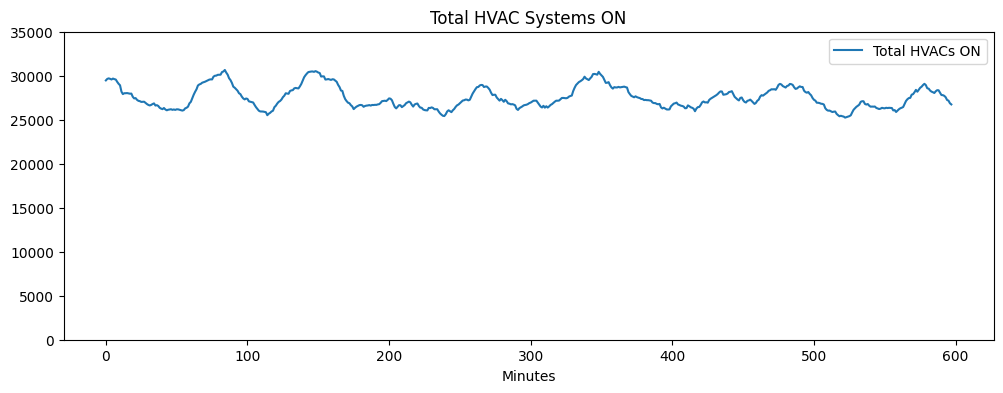

In [12]:
total_hvacs_on_df.plot(title='Total HVAC Systems ON',
                       x='Minutes',
                       y='Total HVACs ON',
                       figsize=(12,4),
                       ylim=(0,35000))